# Metal skupine v prostoru in času

Projektna naloga pri predmetu Programiranje 1

## Vir podatkov
[Encyclopaedia Metallum](http://www.metal-archives.com/), najbolj obsežen poskus arhiviranja podatkov o skupinah z vsaj enim izdanim albumom.

**Zajeti podatki:**
* imena skupin;
* leto ter država njihovega nastanka;
* podzvrst metala, ki jo izvajajo;
* njihov status (*Active/On hold/Split-up/Unknown/Changed name/Disputed*).

**Opomba:** zaradi prevelike količine strani sem se omejila na 125 278 možnih ID-jev (vsaka skupina ima svoj ID, a niso vsi v uporabi). Podatke sem tako zbrala za skoraj 60 000 skupin, od teh je 16 dodanih "na roke". Za primerjavo: trenutno je vseh skupin na [arhivih](http://www.metal-archives.com/) 113 205 (7. december 2016, 18:05).

## Analiza podatkov:
* kdaj je število novih skupin na leto doseglo maksimum;
* kateri žanri so najbolj zastopani ter kdaj so bili najbolj popularni;
* v kateri državi je (bilo) največ aktivnih skupin;
* katera podzvrst je pritegnila največ propadlih skupin.

In [2]:
# priprava datoteke in uvoz podatkov za obdelavo
%matplotlib inline
import pandas as pd
pd.options.display.max_rows=20
#pd.options.display.float_format = '{:,.0f}'.format --> ne pomaga! (letnice)

skupine = pd.read_csv('csv/metal_skupine_id.csv')
statusi = pd.read_csv('csv/statusi.csv')
pos_zvrsti_id = pd.read_csv('csv/zvrsti.csv')
pos_leta = pd.read_csv('csv/leta.csv')

## 1. Katerega leta je nastalo največ novih skupin?

Tu predstavljeni podatki glede novonastalih skupin na leto žal niso najbolj natančni, saj je izpuščenih podatkov preveč.
Realno je največ skupin nastalo **leta 2005**, in sicer kar *5726*. Kakorkoli, če spregledamo leta od 2006 dalje, so podatki precej uporabni.

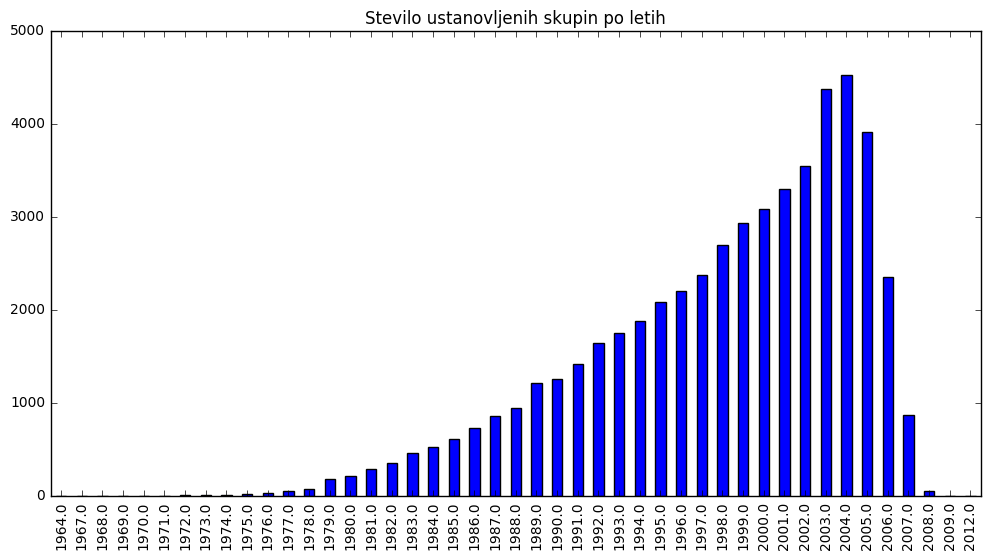

In [26]:
skupine_leto = skupine['leto'].value_counts(sort=False)
skupine_leto.plot(kind='bar', figsize=(12, 6), title='Stevilo ustanovljenih skupin po letih')

Zdaj pa še realni podatki s spletne strani:

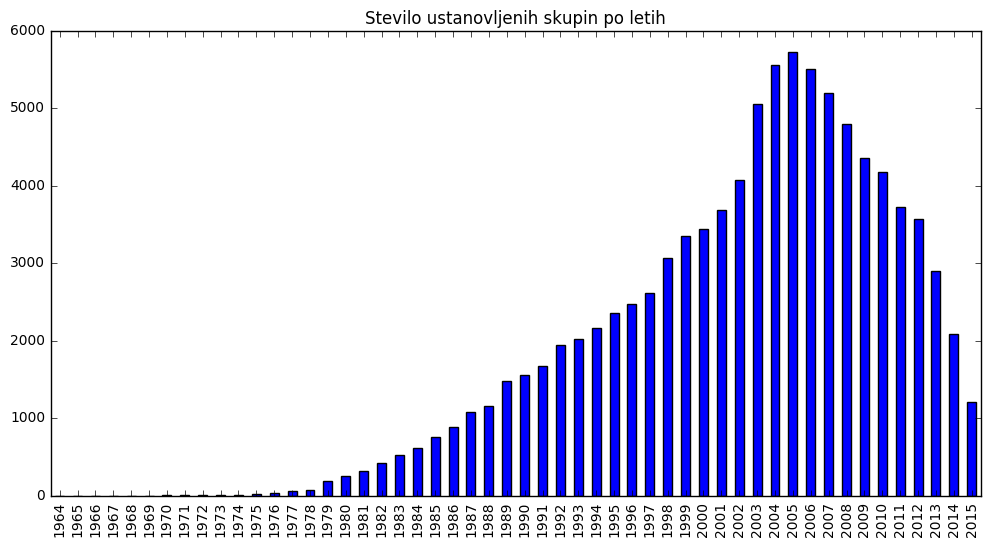

In [25]:
realno_po_letih = pd.Series({1964: 2, 1965: 0, 1966: 0, 1967: 3,
                               1968: 4, 1969: 4, 1970: 6, 1971: 8,
                               1972: 14, 1973: 8, 1974: 9, 1975: 24,
                               1976: 35, 1977: 58, 1978: 77, 1979: 196,
                               1980: 258, 1981: 326, 1982: 431, 1983: 533,
                               1984: 613, 1985: 765, 1986: 893, 1987: 1087,
                               1988: 1157, 1989: 1488, 1990: 1559, 1991: 1677,
                               1992: 1952, 1993: 2029, 1994: 2161, 1995: 2365,
                               1996: 2471, 1997: 2623, 1998: 3073, 1999: 3358,
                               2000: 3448, 2001: 3693, 2002: 4083, 2003: 5053,
                               2004: 5560, 2005: 5726, 2006: 5509, 2007: 5203,
                               2008: 4793, 2009: 4364, 2010: 4179, 2011: 3732,
                               2012: 3571, 2013: 2908, 2014: 2089, 2015: 1210})
realno_po_letih.plot(kind='bar', figsize=(12, 6), title='Stevilo ustanovljenih skupin po letih', color='blue', legend=None)

Kako pa se je popularnost zvrsti spreminjala do leta 2006? Za pridobitev tega podatka je najprej treba združiti tabeli z letnicami in zvrstmi. Skupine, ki so nastale po letu 2006 (2007?), bom izpustila.

In [463]:
leto_zvrst = pos_leta.merge(pos_zvrsti_id)
cisto_leto_zvrst = leto_zvrst[leto_zvrst['leto'] < 2007]
cisto_leto_zvrst
vsote_leta = cisto_leto_zvrst.groupby('leto').aggregate(sum)
#pobrišem stolpec 'id':
vsote_po_letih = vsote_leta[vsote_leta.columns.difference(['id'])]
vsote_po_letih

,A Cappella,AOR,Absence,Acoustic,Adult,Alternative,Ambient,Art Rock,Atmospheric,Ballad,...,Technical,Techno,Thrash,Thrashcore,Trance,Tribal,Trip-Hop,Urban Rock,Viking,World
leto,,,,,,,,,,,,,,,,,,,,,
1964.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1967.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1968.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1969.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1974.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Katere izmed mnogih zvrsti so sploh bistvene? Recimo, da je zvrst zanemarljiva, če je le-tej pripadajočih skupin manj kot tisoč.

In [478]:
vsote_zvrsti = pos_zvrsti_id.sum()
glavne_zvrsti = vsote_zvrsti[vsote_zvrsti >= 1000]
glavne_zvrsti.sort_values()
zvrsti = glavne_zvrsti.to_frame()
nazivi_zvrsti = zvrsti[zvrsti.columns.difference([0])].transpose()
nazivi_zvrsti = nazivi_zvrsti[nazivi_zvrsti.columns.difference(['id'])]
nazivi_zvrsti

,Black,Brutal,Death,Doom,Gothic,Grindcore,Groove,Hard Rock,Heavy,Melodic,Metalcore,Power,Progressive,Rock,Speed,Symphonic,Thrash


Dobila sem serijo zvrsti. Zdaj lahko združim omejeno časovno obdobje z omejenim spektrom zvrsti in dobim odgovor na vprašanje

## 2. Katere zvrsti so bile skozi čas najbolj popularne?

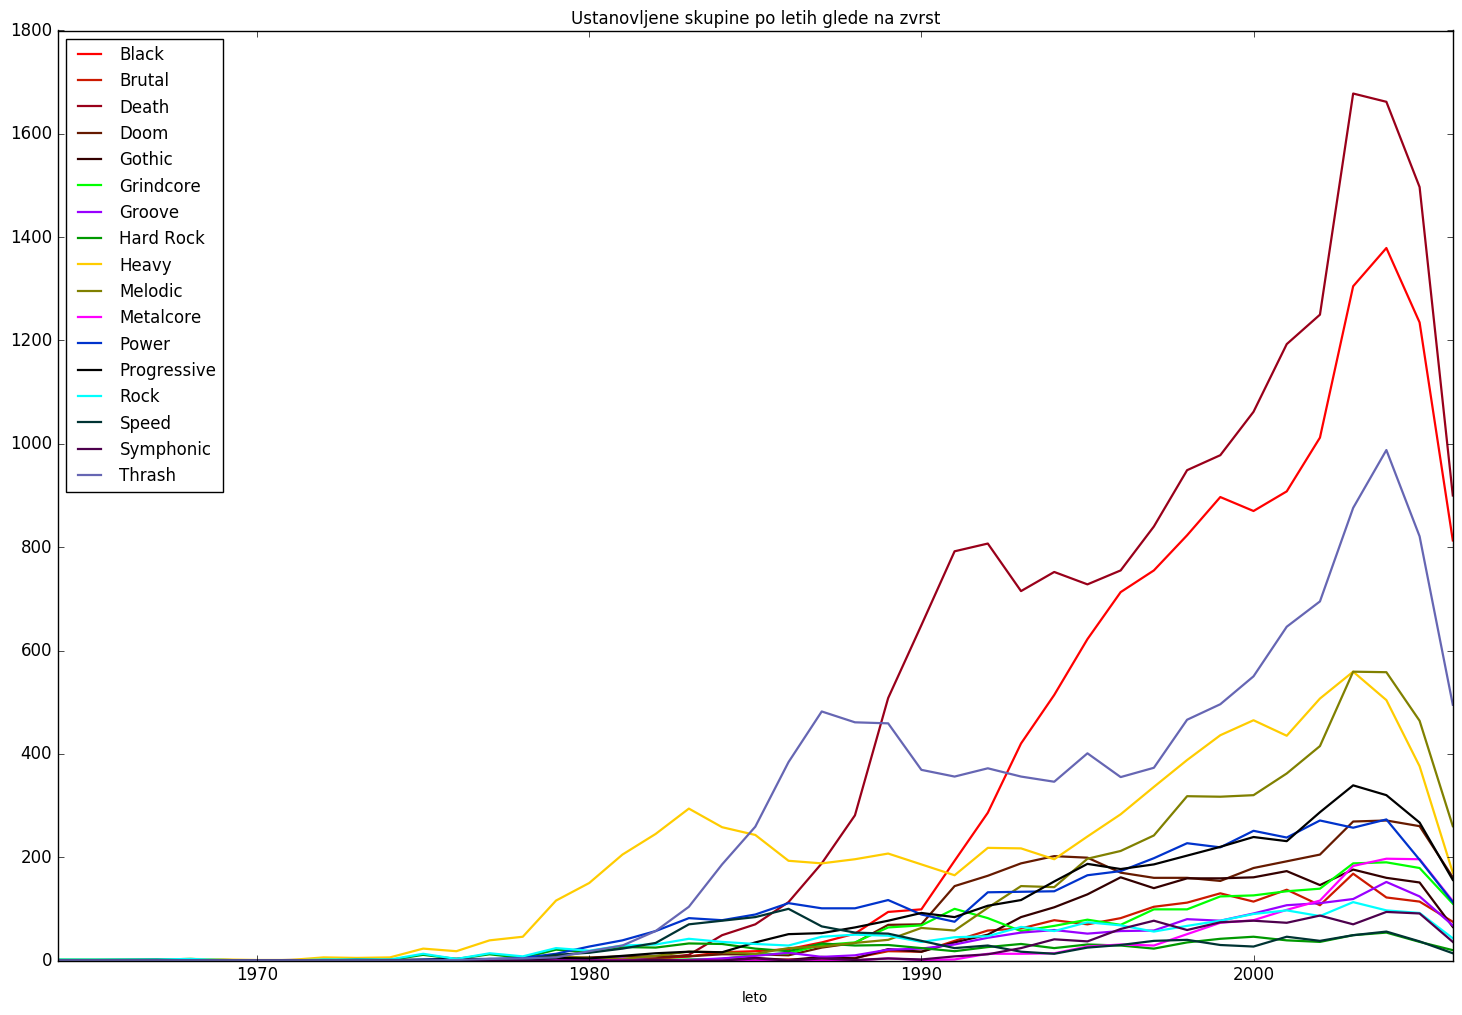

In [479]:
stolpci = [naziv for naziv in nazivi_zvrsti]
omejene_vsote = vsote_po_letih[stolpci]
barve = 5*[(1.0, 0.0, 0.0), (0.8, 0.1, 0.0), (0.6, 0.0, 0.1),  (0.4, 0.1, 0.0), (0.2, 0.0, 0.0),
         (0.0, 1.0, 0.0), (0.6, 0.0, 1.0), (0.0, 0.6, 0.0), (1.0, 0.8, 0.0), (0.5, 0.5, 0.0),
         (1.0, 0.0, 1.0), (0.0, 0.2, 0.8), (0.0, 0.0, 0.0), (0.0, 1.0, 1.0), (0.0, 0.2, 0.2),
           (0.3, 0.0, 0.3), (0.4, 0.4, 0.7)]
for stolpec, barva in zip(omejene_vsote, barve):
    omejene_vsote[stolpec].plot(kind='line',
                                legend=True,
                                figsize=(18, 12),
                                linewidth=1.6,
                                color=barva,
                                fontsize=12,
                                title='Ustanovljene skupine po letih glede na zvrst')

Iz grafa je razvidno, da je najbolj zastopan žanr nasploh **death metal**, sledita mu pa **black** in **thrash metal**. Pred letom 1850 je bil najbolj popularen **Heavy metal**, ki ga je nasledil thrash metal, zatem pa je zavladal death metal. Po pričakovanjih black metal tudi med metalci nikoli ni bil *'mainstream'*.

**Opomba:** ker sem zvrsti delila z uporabo regularnih izrazov, je v zvrst *death metal* vključena tudi podzvrst *melodic death metal*, kar je morda vzrok za tako očitno prevlado te zvrsti.
Po dodatni raziskavi sem ugotovila, da je delež omenjene zvrsti med letoma 1990 in 2007 zanemarljiv, med letoma 2003 in 2006 pa predstavlja melodični death metal kar četrtino vseh death metal skupin. Graf bi z upoštevanjem tega lahko padel pod linijo black metala. 

Oglejmo si posebej grafe teh štirih najbolj razširjenih stilov.

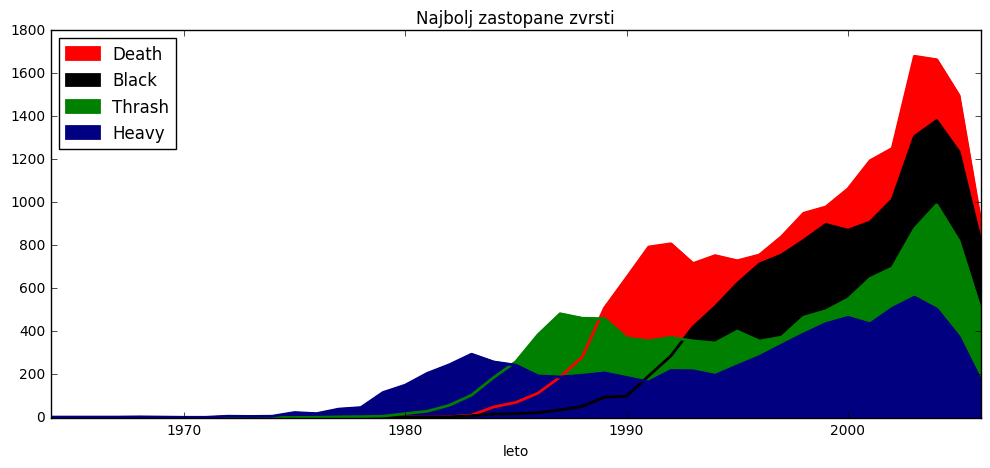

In [466]:
stiri_zvrsti_barve = [('Death', 'red'), ('Black', 'black'), ('Thrash', 'green'), ('Heavy', 'navy')]
for zvrst, barva in stiri_zvrsti_barve:
    omejene_vsote[zvrst].plot(kind='area',
                              legend=True,
                              linewidth=2.0,
                              figsize=(12, 5),
                              color=barva,
                              title='Najbolj zastopane zvrsti')

Če zvrsti ločujemo zelo natančno, sta zgornja grafa ustrezna. Bolje pa bi bilo združiti več podobnih podzvrsti v kategorije. Nekaj sem jih že ročno združila s pomočjo posebnega lepljenja prek funkcije *vsota*.


## 3. Katera država ima največ aktivnih metal skupin?

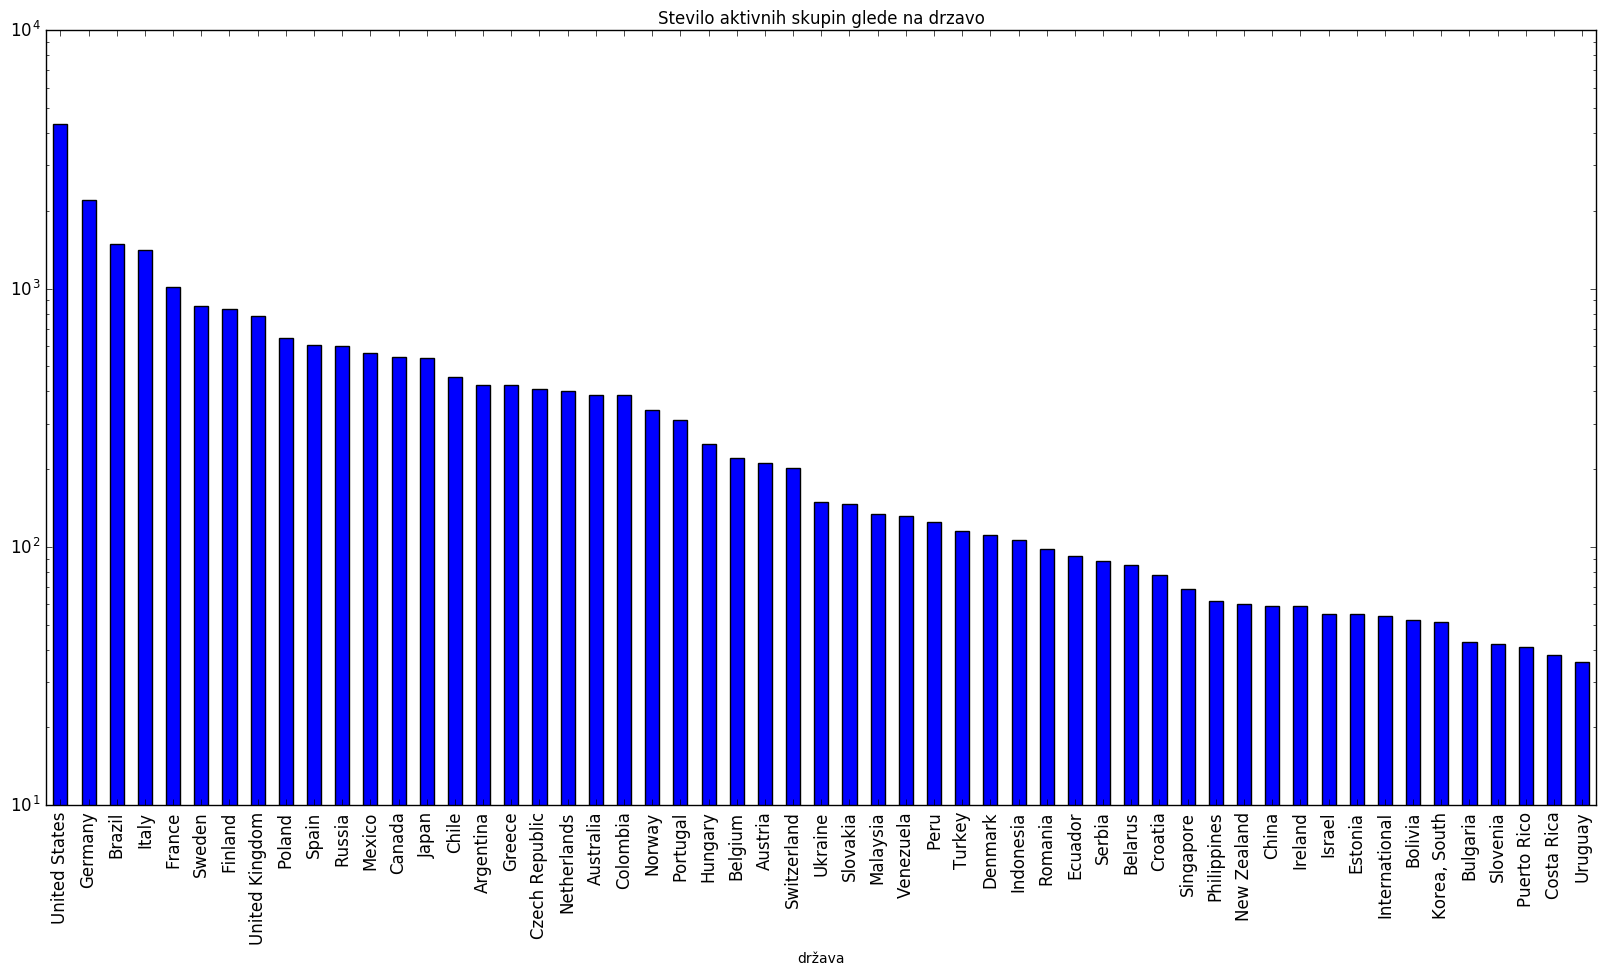

In [467]:
aktivni = skupine[skupine['status'] == 1]
aktivni = aktivni[aktivni.columns.difference(['leto'])]
aktivni_drz = aktivni.groupby('država').aggregate(sum)
aktivni_drz = aktivni_drz.rename(columns={'status': 'število'}).sort_values('število', ascending=False)
aktivni_drz[aktivni_drz != 0][:55].plot(
                 kind='bar',
                 logy=True,
                 legend=None,
                 figsize=(20, 10),
                 fontsize=12,
                 sort_columns=True,
                 title='Stevilo aktivnih skupin glede na drzavo'
)

Po številu trenutno aktivnih skupin očitno prednjači **ZDA**, kar ne preseneča, saj je tretja najbolj naseljena država na svetu (če jo upoštevamo kot celoto). Naslednja je **Nemčija**, sledita še **Brazilija** in **Italija**. Precej več kot 500 skupin prihaja še iz Francije, Švedske, Finske in Velike Britanije.

Če bi upoštevali tudi število prebivalcev v posameznih državah, bi v prednosti bile predvsem skandinavske države.

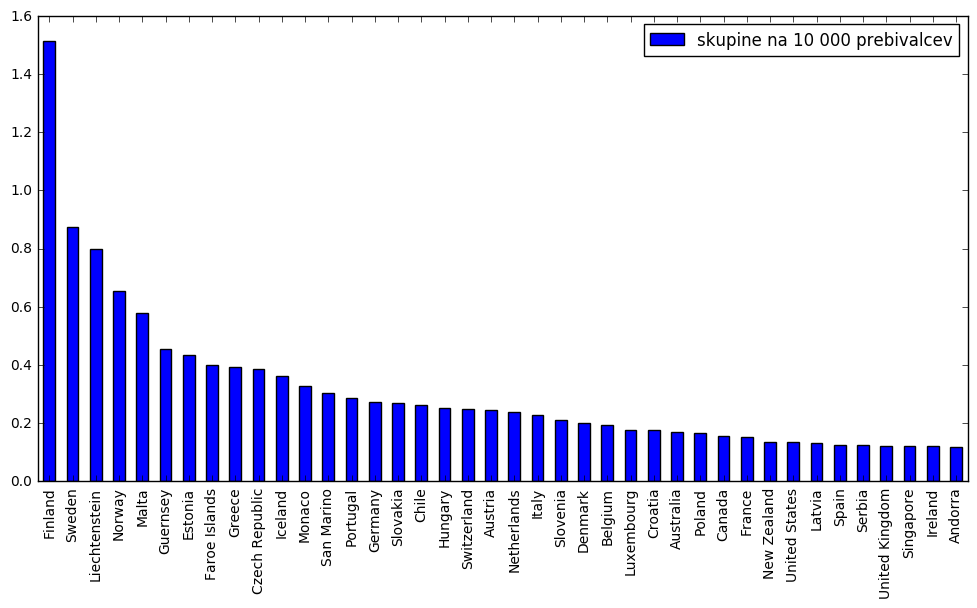

In [544]:
populacija = pd.read_csv('csv/populacija.csv')
drz_st = zip(aktivni_drz.index, aktivni_drz['število'])
populacija_dict = {drz: pop for drz, pop in zip(populacija['Country'], populacija['Population'])}
populacija_dict
utezeno_dict = {drz: {'skupine na 10 000 prebivalcev': 
                      10000*float(st)/populacija_dict[drz]}
                for drz, st in drz_st if drz in populacija_dict.keys()}
utezeno = pd.DataFrame.from_dict(utezeno_dict).transpose().sort_values(
    'skupine na 10 000 prebivalcev', ascending=False)
utezeno[:40].plot(kind='bar', figsize=(12, 6))

Ta rezultat je lažje predstavljivin bolj usklajen s pričakovanji: skandinavske države - **Finska**, **Švedska** in **Norveška** zasedajo v tem vrstnem redu prvo, drugo in četrto mesto, presenetljivo pa je **Liechtenstein** na 3. mestu (verjetno, ker ima res malo prebivalstva). Slovenija ima višje razmerje med metal skupinami in prebivalstvom kot ZDA, ki je po absolutnem številu vodilna. 

Še zadnje vprašanje:

## 4. Katera zvrst ima največji delež propadlih skupin?

Najprej si oglejmo števila propadlih skupin absolutno, nato še relativno.

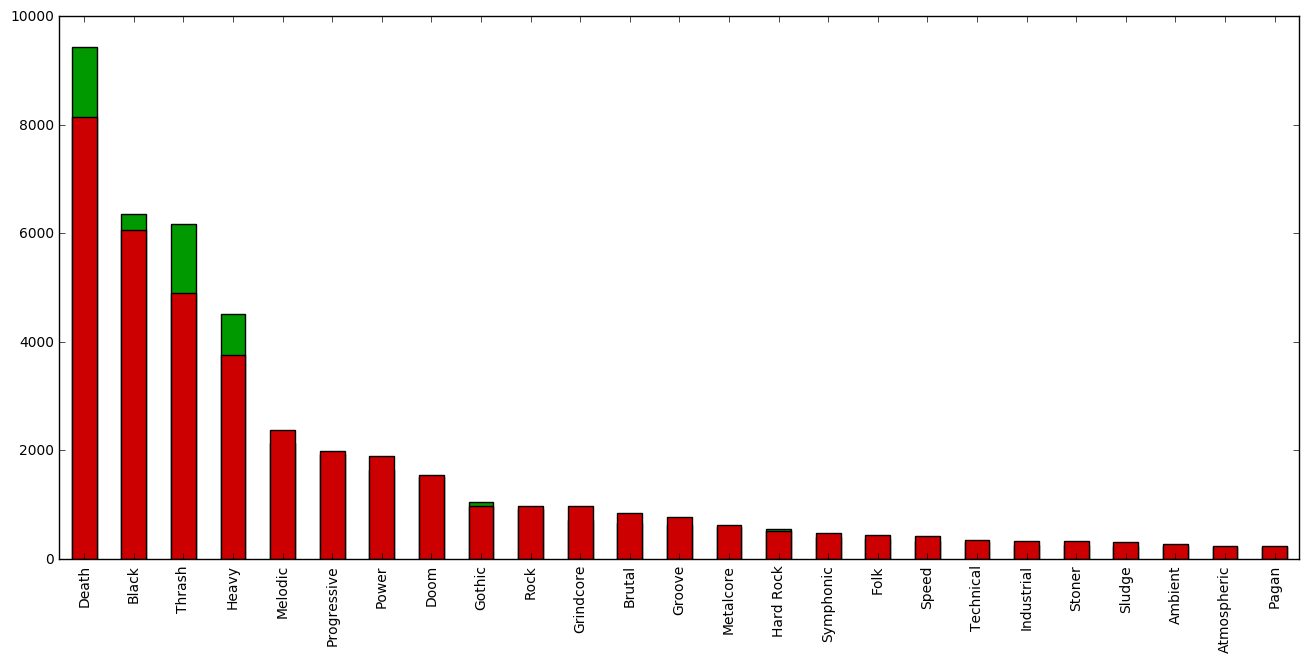

In [511]:
propadli = skupine[(skupine['status'] == 3) | (skupine['status'] == 6)]
# statusi: 3 - Split-Up, 4 - Disputed
neznano = skupine[(skupine['status'] == 2) | (skupine['status'] == 4)
                  | (skupine['status'] == 5) | skupine['status'] == None]
# 2 - On hold, 4 - Unknown, 5 - Changed name
aktivni = skupine[skupine['status'] == 1]
# 1 - Active

# propadli
propadli_zvrst = (pos_zvrsti_id.transpose()[propadli.index]).transpose()
propadli_zvrst = propadli_zvrst[propadli_zvrst.columns.difference(['id'])]
propadli_vsota = propadli_zvrst.sum().sort_values(ascending=False)
#neznano
neznano_zvrst = (pos_zvrsti_id.transpose()[neznano.index]).transpose()
neznano_zvrst = neznano_zvrst[neznano_zvrst.columns.difference(['id'])]
neznano_vsota = neznano_zvrst.sum().sort_values(ascending=False)
#aktivni
aktivni_zvrst = (pos_zvrsti_id.transpose()[aktivni.index]).transpose()
aktivni_zvrst = aktivni_zvrst[aktivni_zvrst.columns.difference(['id'])]
aktivni_vsota = aktivni_zvrst.sum().sort_values(ascending=False)

#propadli_vsota[propadli_vsota != 0][:25].plot(kind='bar', figsize=(16, 7))
propadli_vsota[propadli_vsota != 0][:25].plot(kind='bar', figsize=(16, 7), color=(0, 0.6, 0))
#neznano_vsota[neznano_vsota != 0].plot(kind='bar', figsize=(16, 7))
aktivni_vsota[aktivni_vsota != 0][:25].plot(kind='bar', figsize=(16, 7), color=(0.8, 0, 0))

Po pričakovanjih imajo najbolj številčne zvrsti tudi največ propadlih skupin, zato je treba opazovati delež propadlih skupin glede na zvrst. Premalo zastopane zvrsti bom izpustila s pogojem, da imajo vsaj 20 skupin.

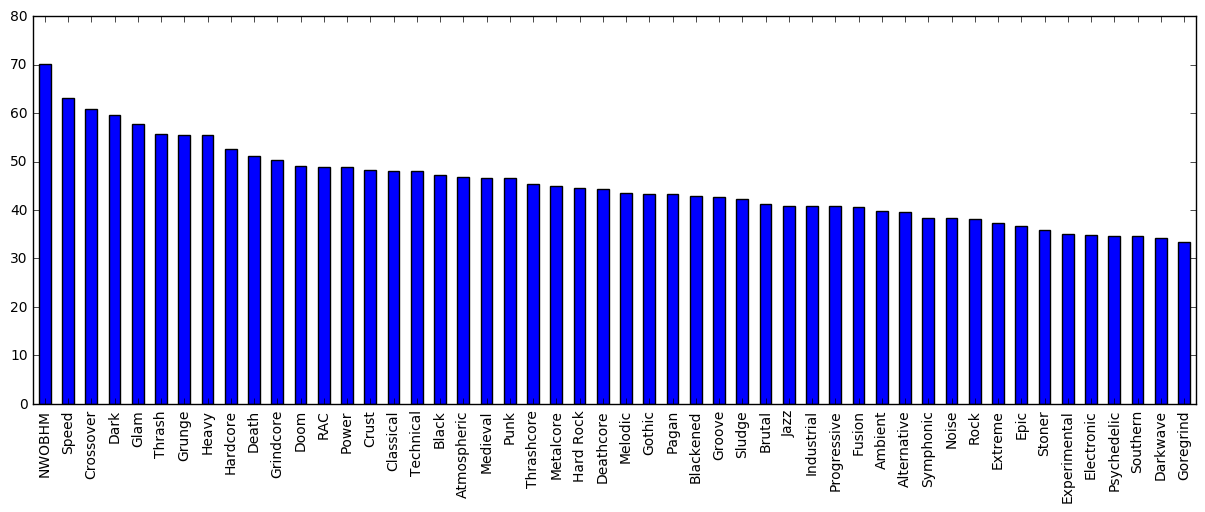

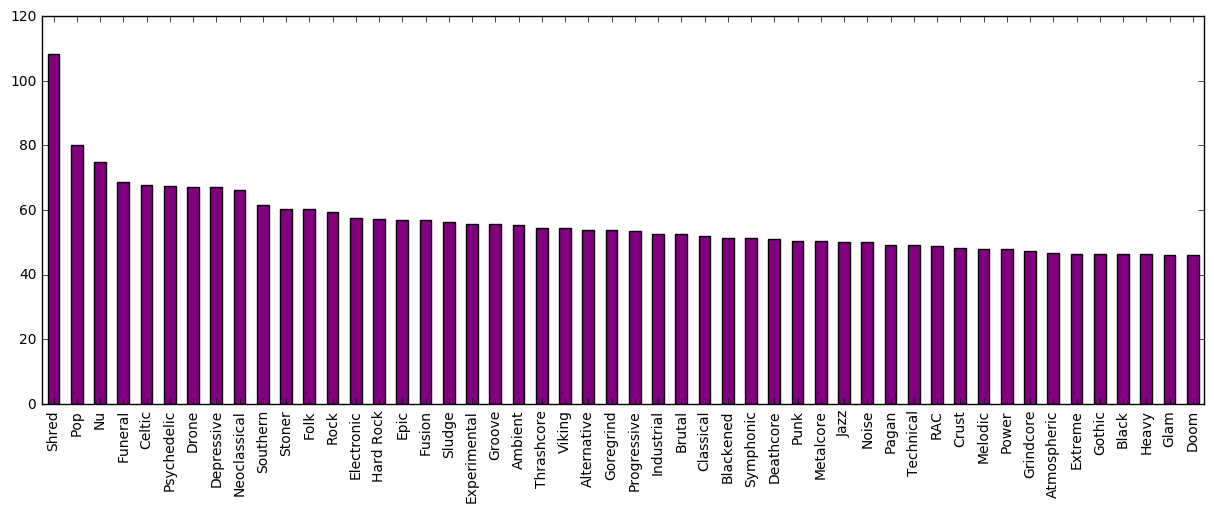

In [551]:
vsote_zvrsti = vsote_leta[vsote_leta.columns.difference(['id'])].sum().sort_values(ascending=False)
propad_relat_dict = {zvrst: {'0': 100*float(propadli_vsota[zvrst])/vsote_zvrsti[zvrst]}
                     for zvrst in propadli_vsota.index if vsote_zvrsti[zvrst] > 20}
propadli_relat = pd.DataFrame.from_dict(propad_relat_dict).transpose().sort_values('0', ascending=False)

aktiv_relat_dict = {zvrst: {'0': 100*float(aktivni_vsota[zvrst])/vsote_zvrsti[zvrst]}
                     for zvrst in aktivni_vsota.index if vsote_zvrsti[zvrst] > 20}
aktivni_relat = pd.DataFrame.from_dict(aktiv_relat_dict).transpose().sort_values('0', ascending=False)

propadli_relat[:50].plot(kind='bar', legend=None, figsize=(15,5))
aktivni_relat[:50].plot(kind='bar', legend=None, figsize=(15,5), color=(0.5, 0, 0.5))
#POPRAVI: kjer so leta 'None', podatki nekje niso upoštevani (?)

Izgleda, da je največji delež propadlih skupin pripadal **NWOBHM** (New Wave of British Heavy Metal), vendar je ta zvrst tudi časovno pogojena; začela je namreč v '70-ih letih. Torej je ta zvrst izjema in niti ni edina.
Relativno zanesljivi podatki se pojavijo šele na 7. mestu: **Thrash** metal še vedno izvaja kopica skupin (tudi po rezultatih zgoraj). Poleg tega sta še **Heavy** ter **Death** metal in **Hardcore**.

Za večjo relevantnost bi bilo potrebno upoštevati časovno aktualnost zvrsti, vendar je le-ta najverjetneje soodvisna z deležem propadlih skupin. Na to vprašanje ne morem dati odgovora; delež propadlih skupin bolj ali manj ni odvisen od zvrsti.